# Quantum Computing Introduction - Assignment 5
# Names:
# IDs:

Welcome to the fifth assignment! During this assignment, you will use the IBM Qiskit package. This framework offers a huge variety of very interesting functionalities to explore. This assignment will require you to investigate about the proper usage of the tool. Please refer to the [IBM Quantum Documentation](https://qiskit.org/documentation/).


# Python environment

The following cell contains some useful definitions and functions for the development of your assignment. They were already introduced in the Qiskit Introduction notebook and included here in case you need them.

In [1]:
# Function: obtain_vector(quantum_circuit)
#
# 
# This function accepts an arbitrary circuit, performs its state vector simulation and 
# returns the resulting vector state as a [x, y, z] vector that could be plotted
def obtain_vector(qc):

    # Execute the state vector simulation
    resulting_vector = Statevector(qc)

    return resulting_vector


# Function: simulate_circuit_and_obtain_vector(quantum_circuit, number_shots)
#
# 
# This function accepts an arbitrary circuit, performs its state vector simulation for
# a number of trials, collects the sample counts and the resulting probabilities and
# returns the resulting vector state as a [x, y, z] vector that could be plotted
def simulate_circuit_and_obtain_vector(qc, trials = 10000):

    # Execute the state vector simulation
    resulting_vector = Statevector(qc)

    # Execute the simulation for a number of trials (10000 per deault)
    counts = resulting_vector.sample_counts(shots = trials)

    # Collect the results from the job
    probabilities = resulting_vector.probabilities()

    return resulting_vector, counts, probabilities




For this assignment you can use whatever simulator you consider useful to solve the exercises. Read carefully the questions and identify the most suitable simulator for your purposes. Moreover, you will have to setup your own [QuantumCircuit](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#quantumcircuit) because we are not going to use only 2-qubit quantum system. Hence, your solution should include the complete setup process to create and simulate the requested quantum circuit.

## Question 1

In the assignent on Quantum Programming 2 (Assignment 4), we mentioned the concept of _total equivalence_, namely, the identity of the output states (modulo a global phase difference) between the two circuits under verification. Moreover, you showed the total equivalence of the following quantum circuits.

![Question1](img/qci_a5_question1.png)

Additionally, as mentioned during the lessons, different quantum processors deal with the quantum circuits in different ways, depending on the topology, number of qubits, set of available gates, etc.. Perform the following steps:

1. Implement the quantum circuit in the left,
2. Draw the decomposed circuit from it.
3. Show how the Swap gate is actually implemented in your preferred backend.

Original left circuit:


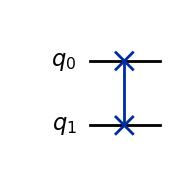

Decomposed circuit:


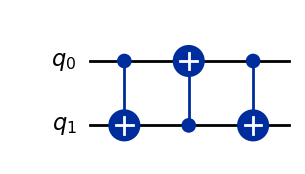

Transpiled circuit for AerSimulator:


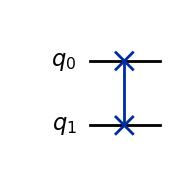

Gate counts (original): OrderedDict({'swap': 1})
Gate counts (transpiled): OrderedDict({'swap': 1})
Isolated SWAP transpiled (typically 3 CX gates):


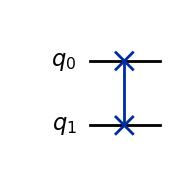

Isolated SWAP gate counts: OrderedDict({'swap': 1})


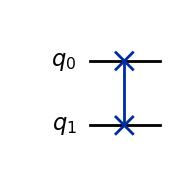

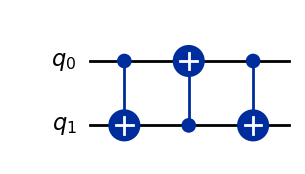

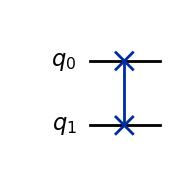

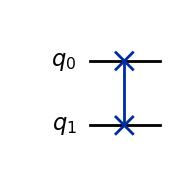

In [12]:
%matplotlib inline

from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


# 1) Implement the circuit shown on the LEFT in Question 1 image
# NOTE: Replace the gate sequence below with the exact one from your image.
# Keep SWAP as in the assignment (that is the important part for step 3).
qc_left = QuantumCircuit(2, name="q1_left")

#example placeholder structure

qc_left.swap(0, 1)

print("Original left circuit:")
display(qc_left.draw("mpl"))

# 2) Draw decomposed circuit
# decompose() expands composite instructions like SWAP
qc_decomposed = qc_left.decompose(reps=5)
print("Decomposed circuit:")
display(qc_decomposed.draw("mpl"))


# 3) Show how SWAP is implemented in preferred backend (AerSimulator)
backend = AerSimulator()

# Transpile for backend to see native implementation
qc_transpiled = transpile(qc_left, backend=backend, optimization_level=0)
print("Transpiled circuit for AerSimulator:")
display(qc_transpiled.draw("mpl"))

print("Gate counts (original):", qc_left.count_ops())
print("Gate counts (transpiled):", qc_transpiled.count_ops())

#isolate SWAP implementation only
qc_swap = QuantumCircuit(2, name="swap_only")
qc_swap.swap(0, 1)

qc_swap_transpiled = transpile(qc_swap, backend=backend, optimization_level=0)
print("Isolated SWAP transpiled (typically 3 CX gates):")
display(qc_swap_transpiled.draw("mpl"))
print("Isolated SWAP gate counts:", qc_swap_transpiled.count_ops())


On AerSimulator, the SWAP gate is transpiled into native two-qubit operations.
For the isolated SWAP circuit, transpilation yields typically 3 CX gates (count_ops() ≈ {'cx': 3}), showing how SWAP is actually implemented on the backend.

## Question 2

Preparing for the upcoming assessment, one of your classmates identified a quantum circuit supposed to prepare one of the Bell states (specifically $\ket{\Phi^{+}}$). As usual, you are not completely sure about its validity, hence your are going to implement such circuit in Qiskit to figure it out. Assume $\ket{q_{1}q_{0}}$ = $\ket{00}$. 

Perform the following steps:

1. Implement the following circuit.
2. Execute the simulator.
3. Print the resulting vector state.
4. Does the proposed circuit prepare the corresponding Bell state?

![Question2](img/qci_a5_question2.png)

question 2 circuit:


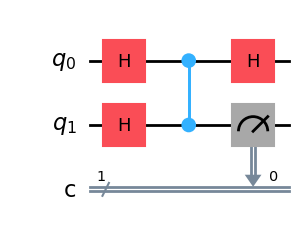

Resulting vector state:
Statevector([7.07106781e-01+0.j, 2.29934717e-17+0.j, 2.29934717e-17+0.j,
             7.07106781e-01+0.j],
            dims=(2, 2))
[7.07106781e-01+0.j 2.29934717e-17+0.j 2.29934717e-17+0.j
 7.07106781e-01+0.j]


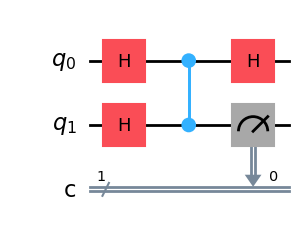

In [15]:
%matplotlib inline

from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

#Build circuit for question 2
qc_2 = QuantumCircuit(2, 1, name="qc_2")
qc_2.h(0)
qc_2.h(1)
qc_2.cz(0, 1)
qc_2.h(0)
qc_2.measure(1, 0)

print("question 2 circuit:")
display(qc_2.draw("mpl"))

# remove final measurements (keeps your original qc_2 unchanged)
qc_2_no_meas = qc_2.remove_final_measurements(inplace=False)

# compute statevector
sv = Statevector.from_instruction(qc_2_no_meas)

print("Resulting vector state:")
print(sv)        # pretty format
print(sv.data)   # raw complex amplitudes

yes the proposed circuit does prepare the Bell state.

For the gate sequence:
(H) on both qubits
(CZ)
(H) on (q_0)

## Question 3

Moreover, your classmate claims that by manipulating the initial state (using something different from $\ket{00}$), you can also prepare another Bell state ($\ket{\Psi^{-}}$).

1. Could you confirm that?
2. What should you do with the initial state to produce the requested Bell state?

Yes it is possible to produce another bell state by manipulating both qubits before the propused circuit above with an x-gate

Statevector: [ 2.29934717e-17+0.j  7.07106781e-01+0.j -7.07106781e-01+0.j
 -2.29934717e-17+0.j]
Matches |Psi-> up to global phase: True
question 3 circuit:


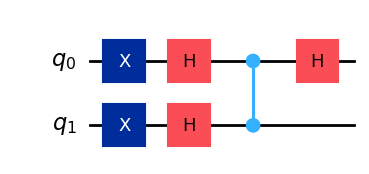

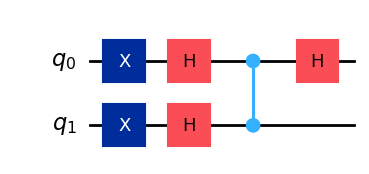

In [17]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

qc3 = QuantumCircuit(2)

# prepare |11> instead of |00>
qc3.x(0)
qc3.x(1)

# same circuit as Q2
qc3.h(0)
qc3.h(1)
qc3.cz(0, 1)
qc3.h(0)

sv = Statevector.from_instruction(qc3)
print("Statevector:", sv.data)

target = np.array([0, 1/np.sqrt(2), -1/np.sqrt(2), 0], dtype=complex)
print("Matches |Psi-> up to global phase:",
      np.allclose(sv.data, target) or np.allclose(sv.data, -target))

print("question 3 circuit:")
display(qc3.draw("mpl"))

## Question 4

At this point, you have 2 different quantum circuits for the preparation of the Bell states. They are totally equivalent; however, their actual implementation on a quantum processor is different.

![Question4](img/qci_a5_question4.png)

Perform the following steps:

1. Draw the transpiled circuit that you obtained from these circuits, using your preferred backend.
2. Explain the actual quantum gates used for the tranpilation process.

Transpiled qc_2:


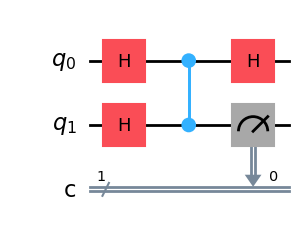

Gate counts: OrderedDict({'h': 3, 'cz': 1, 'measure': 1})
Transpiled qc_4:


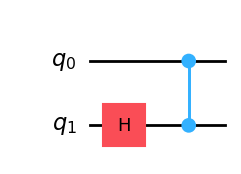

Gate counts: OrderedDict({'h': 1, 'cz': 1})
Operation names: dict_keys(['s', 'crz', 'for_loop', 'pauli', 'delay', 'cu2', 'set_density_matrix', 'qerror_loc', 'save_statevector_dict', 'h', 'multiplexer', 'unitary', 'mcu', 'mcrz', 'mcz', 'ccz', 'mcx', 'store', 'sxdg', 'tdg', 'rzz', 'superop', 'save_matrix_product_state', 'u2', 'swap', 'cy', 'cz', 'save_amplitudes', 'roerror', 'save_amplitudes_sq', 'measure', 'quantum_channel', 'save_expval', 'save_expval_var', 'x', 'rx', 'cu3', 'r', 'save_probabilities', 'rzx', 'id', 'set_statevector', 'cp', 'mcswap', 'mcx_gray', 'cu', 'save_probabilities_dict', 'ryy', 'mcy', 'kraus', 'ry', 'ccx', 'rxx', 'save_superop', 'save_clifford', 'save_density_matrix', 'csx', 'save_state', 'save_stabilizer', 'crx', 'u', 'cswap', 'mcu2', 'reset', 'while_loop', 'mcphase', 'mcr', 'continue_loop', 'cx', 'set_stabilizer', 'mcu1', 'save_unitary', 'diagonal', 'rz', 'mcu3', 'cu1', 'switch_case', 'p', 'set_superop', 'y', 'ecr', 'initialize', 'break_loop', 'sx', 'if_else', '

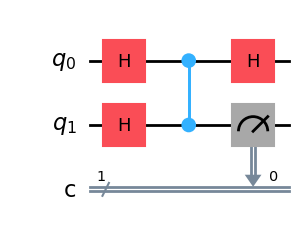

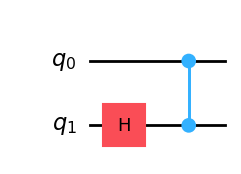

In [20]:
from qiskit import transpile
from qiskit_aer import AerSimulator

backend = AerSimulator()

# Build another circuit for question 4
qc_4 = QuantumCircuit(2)
qc_4.h(1)
qc_4.cz(1, 0)


#transpile both at once
t_qc2, t_qc4 = transpile([qc_2, qc_4], backend=backend, optimization_level=0)

print("Transpiled qc_2:")
display(t_qc2.draw("mpl"))
print("Gate counts:", t_qc2.count_ops())

print("Transpiled qc_4:")
display(t_qc4.draw("mpl"))
print("Gate counts:", t_qc4.count_ops())

print("Operation names:", backend.target.operation_names)
print("t_qc2 ops:", t_qc2.count_ops())
print("t_qc4 ops:", t_qc4.count_ops())

## Question 5

Self-preparing for the minor, another classmate learn the concept of _partial equivalence_ of quantum circuits. Two circuits are partially equivalent if, given any valid initial input state, they exhibit the same probability for each measurement outcome. Basically, two circuits exhibit the same probability for every possible measurement outcome. Moreover, not all qubits of a circuit need to be measured and there can be a set of initial states to be verified
not just a particular single initial state.

By applying this proposed definition, your classmate identified the following two circuits and she claims that they are partially equivalent.

![Question5](img/qci_a5_question5.png)

1. Can you verify that your classmate's claim holds for the initial state $\ket{q_{2}q_{1}q_{0}} = \ket{000}$?

In [29]:
# build circuits (no measurements needed for Statevector probability check)
qc_5_left = QuantumCircuit(3, 1)
qc_5_left.cswap(1, 0, 2)
qc_5_left.h(0)
qc_5_left.z(2)
qc_5_left.cswap(1, 0, 2)

qc_5_right = QuantumCircuit(3, 1)
qc_5_right.x(1)
qc_5_right.ch(1, 0)

sv_left = Statevector.from_instruction(qc_5_left)
sv_right = Statevector.from_instruction(qc_5_right)

# if only q0 is measured in the exercise:
p_left_q0 = sv_left.probabilities([0])   # [P(q0=0), P(q0=1)]
p_right_q0 = sv_right.probabilities([0])

print("Left  probs on q0:", p_left_q0)
print("Right probs on q0:", p_right_q0)
print("Partially equivalent on q0?", np.allclose(p_left_q0, p_right_q0))

Left  probs on q0: [0.5 0.5]
Right probs on q0: [0.5 0.5]
Partially equivalent on q0? True


 ## Question 6

 The definition of _partial equivalence_ mentions `any valid input state`; however, your previous answer only consider one initial state ($\ket{q_{2}q_{1}q_{0}} = \ket{000}$). Perform the following steps:
 
 1. Could you verify the claim with a random initial quantum state?
 2. Show the probability distribution functions for each circuit.
 3. Explain whether they are the same or not.

Left full probabilities:
{np.str_('000'): np.float64(0.05156375379986556), np.str_('001'): np.float64(0.09967045955184668), np.str_('010'): np.float64(0.10277212793873902), np.str_('011'): np.float64(0.015757145414469487), np.str_('100'): np.float64(0.47727313277503797), np.str_('101'): np.float64(0.06149824741791472), np.str_('110'): np.float64(0.0221517358835598), np.str_('111'): np.float64(0.1693133972185663)}

Right full probabilities:
{np.str_('000'): np.float64(0.10624933816180837), np.str_('001'): np.float64(0.11842070637108429), np.str_('010'): np.float64(0.05156375379986556), np.str_('011'): np.float64(0.09967045955184668), np.str_('100'): np.float64(0.018674525660490528), np.str_('101'): np.float64(0.06664983626195149), np.str_('110'): np.float64(0.47727313277503797), np.str_('111'): np.float64(0.06149824741791472)}

Marginal probabilities on q0
Left : [0.65376075 0.34623925]
Right: [0.65376075 0.34623925]

Same full distribution?  False
Same q0 distribution?    True


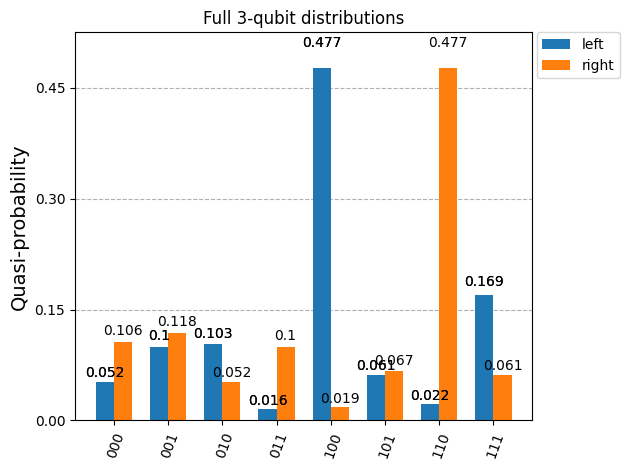

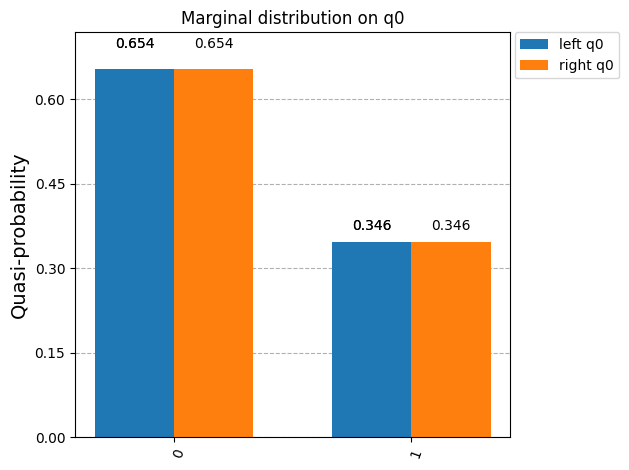

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, random_statevector
from qiskit.visualization import plot_histogram

# Reproducible random initial 3-qubit state
psi0 = random_statevector(2**3, seed=42)

# Left circuit
qc_6_left = QuantumCircuit(3)
qc_6_left.initialize(psi0.data, [0, 1, 2])
qc_6_left.cswap(1, 0, 2)
qc_6_left.h(0)
qc_6_left.z(2)
qc_6_left.cswap(1, 0, 2)

# Right circuit
qc_6_right = QuantumCircuit(3)
qc_6_right.initialize(psi0.data, [0, 1, 2])
qc_6_right.x(1)
qc_6_right.ch(1, 0)

# Statevectors after each circuit
sv_left = Statevector.from_instruction(qc_6_left)
sv_right = Statevector.from_instruction(qc_6_right)

# Full 3-qubit probability distributions
p_left_full = sv_left.probabilities_dict()
p_right_full = sv_right.probabilities_dict()

print("Left full probabilities:")
print(p_left_full)
print("\nRight full probabilities:")
print(p_right_full)

# If partial equivalence is checked on measured q0 only:
p_left_q0 = sv_left.probabilities([0])   # [P(q0=0), P(q0=1)]
p_right_q0 = sv_right.probabilities([0])

print("\nMarginal probabilities on q0")
print("Left :", p_left_q0)
print("Right:", p_right_q0)

print("\nSame full distribution? ", np.allclose(sv_left.probabilities(), sv_right.probabilities()))
print("Same q0 distribution?   ", np.allclose(p_left_q0, p_right_q0))

#plots
fig1 = plot_histogram([p_left_full, p_right_full], legend=["left", "right"], title="Full 3-qubit distributions")
plt.show()

fig2 = plot_histogram(
    [{"0": float(p_left_q0[0]), "1": float(p_left_q0[1])},
     {"0": float(p_right_q0[0]), "1": float(p_right_q0[1])}],
    legend=["left q0", "right q0"],
    title="Marginal distribution on q0"
)
plt.show()

## Question 7

During the lecture: "Fundamentals: A Multi-Qubit World (2)", I introduced the Greenberger-Horne-Zeilinger (GHZ) state for a 3-qubit quantum system. Perform the following steps:

1. Assemble a circuit that creates a 5-qubit GHZ state.
2. Draw the circuit.
3. Show the resulting state vector.

5-qubit GHZ circuit:


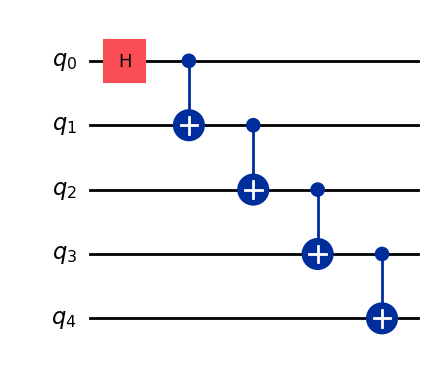

Resulting statevector:
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2, 2, 2))
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0

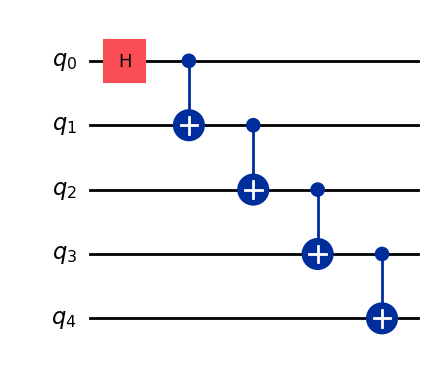

In [32]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Assemble a 5-qubit GHZ circuit
qc_7 = QuantumCircuit(5, name="ghz_5")
qc_7.h(0)
qc_7.cx(0, 1)
qc_7.cx(1, 2)
qc_7.cx(2, 3)
qc_7.cx(3, 4)

# Draw the circuit
print("5-qubit GHZ circuit:")
display(qc_7.draw("mpl"))

# Show resulting state vector
sv_7 = Statevector.from_instruction(qc_7)
print("Resulting statevector:")
print(sv_7)
print(sv_7.data)

## Question 8

During the lecture: "Fundamentals: A Multi-Qubit World (2)", I presented the following quantum circuit for parity calculation on communication systems:

![Question8](img/qci_a5_question8.png)

Assuming $\ket{q_{2}q_{1}q_{0}}$ = $\ket{000}$, perform the following steps:

1. Assemble, draw and simulate the appropriate circuit.
2. Show the resulting probabilities of the simulations.

NB: The circuit presented during the lecture only measures the `parity qubit` (the most significative qubit). For completeness, in this exercise you should measure all 3 qubits.

Original qc_8:


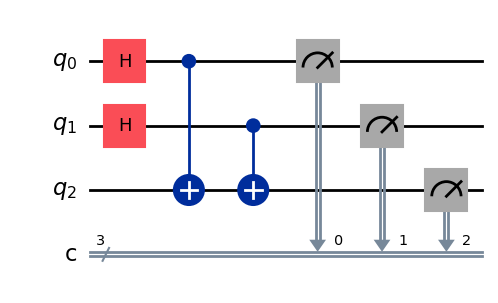

Counts: {'110': 2455, '000': 2475, '101': 2527, '011': 2543}
Probabilities: {'110': 0.2455, '000': 0.2475, '101': 0.2527, '011': 0.2543}


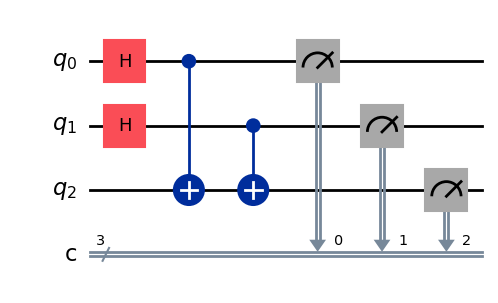

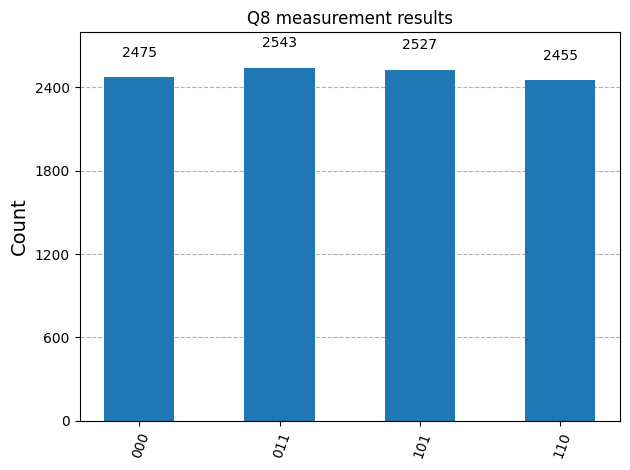

In [40]:
# Draw circuit
qc_8 = QuantumCircuit(3, 3, name="parity calculation")

qc_8.h(0)
qc_8.h(1)
qc_8.cx(0, 2)
qc_8.cx(1, 2)
qc_8.measure([0, 1, 2], [0, 1, 2])

print("Original qc_8:")
display(qc_8.draw("mpl"))

# Simulate
backend = AerSimulator()
t_qc8 = transpile(qc_8, backend)
result = backend.run(t_qc8, shots=10000).result()

counts = result.get_counts()
print("Counts:", counts)

# Convert to probabilities
shots = sum(counts.values())
probs = {k: v / shots for k, v in counts.items()}
print("Probabilities:", probs)

plot_histogram(counts, title="Q8 measurement results")
plt.show()

## Question 9

Considering the obtained results from `Question 8`, explain how can you use them to back up the claim: `"State collapsed to the given parity measurement!"` presented during the lecture. The answer to this question does not require a python code. You just have to analyze the results and provide an answer.

only parity-compatible outcomes occur, which supports the claim “state collapsed to the given parity measurement.”

## Question 10

During the lecture: "Fundamentals: A Multi-Qubit World (2)", I introduced the Quantum Teleportation algorithm.

1. Implement, simulate and draw the teleportation quantum circuit.
2. Show the initial and the resulting vector state (you can use the Bloch sphere).
3. Explain how do you recognize that the algorithm works.

![Question10](img/qci_a5_question10.png)

**NB:** In order to better show the result of your algorithm, you should initialize your quantum circuit to a random or predefined vector state. You could use the `circuit.initialize()` command to perform such task.

Initial |psi>: [0.00125712-0.28014764j 0.30529478-0.91011583j]
Teleportation circuit:


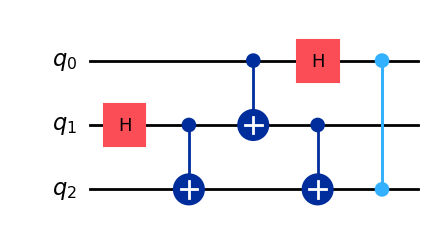

Final 3-qubit statevector:
[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
Fidelity(receiver q2, initial |psi>): 0.07848427976473366


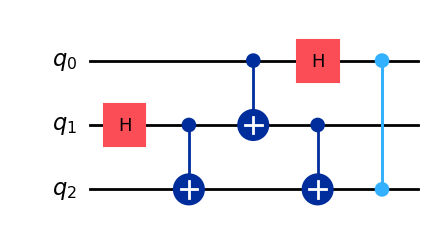

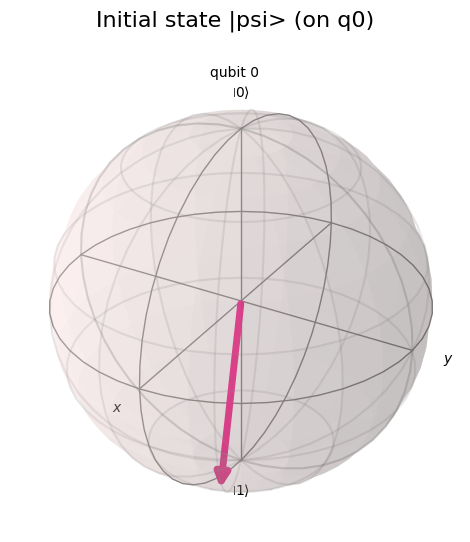

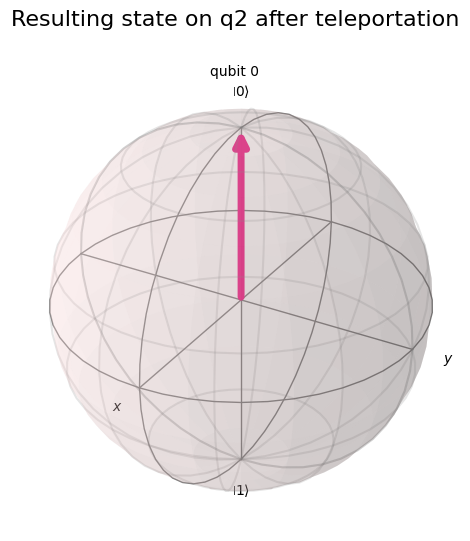

In [58]:
from qiskit.quantum_info import random_statevector, partial_trace, state_fidelity
from qiskit.visualization import plot_bloch_multivector

# Initial single-qubit state |psi> to teleport
psi = random_statevector(2, seed=7)
print("Initial |psi>:", psi.data)

# Build teleportation circuit
qc_10 = QuantumCircuit(3, name="teleportation circuit")
qc_10.h(1)
qc_10.cx(1, 2)
qc_10.cx(0, 1)
qc_10.h(0)

# Coherent corrections (deferred-measurement equivalent)
qc_10.cx(1, 2)   # equivalent to classically controlled X
qc_10.cz(0, 2)   # equivalent to classically controlled Z

print("Teleportation circuit:")
display(qc_10.draw("mpl"))

# Final 3-qubit statevector
sv_final = Statevector.from_instruction(qc_10)
print("Final 3-qubit statevector:")
print(sv_final.data)

# Extract receiver qubit (q2) and compare with initial |psi>
rho2 = partial_trace(sv_final, [0, 1])   # keep q2
fid = state_fidelity(rho2, psi)
print("Fidelity(receiver q2, initial |psi>):", fid)

# Bloch spheres: initial vs resulting receiver state
plot_bloch_multivector(psi, title="Initial state |psi> (on q0)")
plt.show()

plot_bloch_multivector(rho2, title="Resulting state on q2 after teleportation")
plt.show()

The Bloch sphere of the final receiver qubit overlaps with the initial Bloch sphere of $|\psi\rangle$.
The correction bits are random, but after applying the (X/Z) corrections, the output state is always the same target $|\psi\rangle$.
So the algorithm is validated because the quantum information is reproduced on (q_2) with unit (or near-unit) fidelity.

In [59]:
print('Software version:\n')
!pip list | grep "qiskit"
!pip list | grep "IBMQuantumExperience"
!python --version

Software version:



'grep' is not recognized as an internal or external command,
operable program or batch file.
'grep' is not recognized as an internal or external command,
operable program or batch file.


Python 3.13.12
